In [ ]:
import tensorflow as tf

In [ ]:
pip install Pillow

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 21.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 이미지 비율 유지 + 패딩하기

In [ ]:
from PIL import Image, ImageOps
import os

#설정값
input_root = r"E:\VS\Trot"# 원본 이미지들이 있는 최상위 폴더 경로
output_root = r"E:\train"      # 장르별로 저장될 폴더 경로
target_size = (224, 224)

#이미지 처리 함수
def resize_and_pad_image(input_path, output_path):
    with Image.open(input_path) as img:
        img = img.convert("RGB")
        img.thumbnail(target_size, Image.LANCZOS)

        delta_w = target_size[0] - img.size[0]
        delta_h = target_size[1] - img.size[1]
        padding = (
            delta_w // 2, delta_h // 2,
            delta_w - delta_w // 2, delta_h - delta_h // 2
        )
        new_img = ImageOps.expand(img, padding, fill=(0, 0, 0))
        new_img.save(output_path)

#모든 이미지 순회 및 처리
# 장르명은 input_root 폴더명의 마지막 부분으로 고정
genre = os.path.basename(input_root)
output_dir = os.path.join(output_root, genre)
os.makedirs(output_dir, exist_ok=True)

for root, dirs, files in os.walk(input_root):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            full_input_path = os.path.join(root, file)

            # 저장 경로 설정 (장르 폴더 안에 저장)
            output_path = os.path.join(output_dir, file)

            # 처리
            resize_and_pad_image(full_input_path, output_path)
            print(f"저장 완료: {output_path}")


In [ ]:
pip install scikit-learn matplotlib tensorflow

## **모바일넷2 코드**

Found 800 images belonging to 6 classes.
Found 200 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 465ms/step - accuracy: 0.1617 - loss: 2.3153 - val_accuracy: 0.2600 - val_loss: 1.8233
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.2370 - loss: 2.0359 - val_accuracy: 0.2550 - val_loss: 1.8187
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - accuracy: 0.2498 - loss: 2.0309 - val_accuracy: 0.2800 - val_loss: 1.7673
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.2141 - loss: 2.0403 - val_accuracy: 0.3350 - val_loss: 1.7269
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 337ms/step - accuracy: 0.2885 - loss: 1.8854 - val_accuracy: 0.3100 - val_loss: 1.7451
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.2582 - loss: 1.9577 - val_accuracy: 0.3200 - val_loss: 1.7330
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 311ms/step - accuracy: 0.3130 - loss: 1.7940 - val_accuracy: 0.3200 - val_loss: 1.7203
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.2657 - loss: 1.8721 - val_accu

✅ 모델 저장 완료


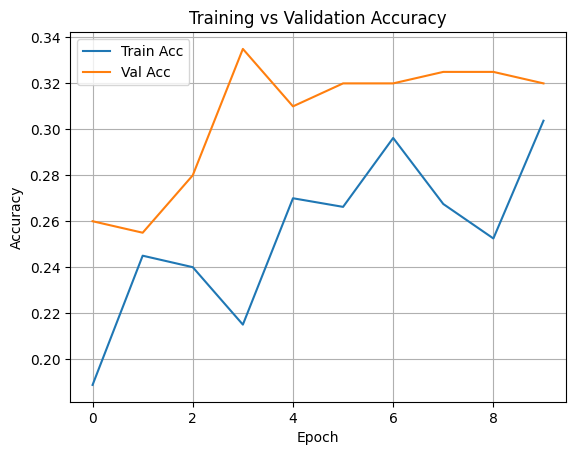

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step

📊 Classification Report:
              precision    recall  f1-score   support

     Ballade       0.37      0.72      0.49        60
       Dance       0.34      0.50      0.40        40
      Hiphop       0.00      0.00      0.00        20
         RnB       0.00      0.00      0.00        20
        Rock       0.00      0.00      0.00        20
        Trot       0.21      0.12      0.16        40

    accuracy                           0.34       200
   macro avg       0.15      0.22      0.18       200
weighted avg       0.22      0.34      0.26       200



c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#설정
data_dir = r"D:\data_vs_resize(224)"  # 데이터 폴더
img_size = (224, 224)
batch_size = 16
epochs = 10

#데이터셋 불러오기
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())

#MobileNetV2 불러오기 (top 제거 + 입력 크기 지정)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#동결 (사전학습된 특징 그대로 사용)
for layer in base_model.layers:
    layer.trainable = False

#출력층
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

#컴파일
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#학습
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

#저장
model.save("mobilenetv2_genre_model.h5")
print("✅ 모델 저장 완료")

#정확도 시각화
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

#검증 리포트
val_gen.reset()
pred_probs = model.predict(val_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_gen.classes
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
from sklearn.metrics import classification_report

class_names = list(val_gen.class_indices.keys())

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



📊 Classification Report:
              precision    recall  f1-score   support

     Ballade       0.37      0.72      0.49        60
       Dance       0.34      0.50      0.40        40
      Hiphop       0.00      0.00      0.00        20
         RnB       0.00      0.00      0.00        20
        Rock       0.00      0.00      0.00        20
        Trot       0.21      0.12      0.16        40

    accuracy                           0.34       200
   macro avg       0.15      0.22      0.18       200
weighted avg       0.22      0.34      0.26       200



c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\.conda\envs\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

## **모바일넷과 동일한 증강처리를 한 efficient net b1**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#경로 설정
data_dir = r"C:\Users\User\Desktop\train"  # 본인 환경에 맞게 수정
img_size = (224, 224)
batch_size = 16
epochs = 10

#데이터셋 불러오기
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())

#EfficientNetB1 모델 로드 (사전학습 + 커스텀 출력층)
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#레이어 동결
for layer in base_model.layers:
    layer.trainable = False

#출력층
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # MobileNet과 동일하게 0.5로 맞춤
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

#컴파일
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#학습
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

#저장
model.save("efficientnetb1_matched_aug.h5")
print("모델 저장 완료: efficientnetb1_matched_aug.h5")

#정확도 그래프
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

#성능 리포트
val_gen.reset()
pred_probs = model.predict(val_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_gen.classes
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


### **곡별 폴더 정리**

In [ ]:
import os
import shutil
import re

# 장르 폴더들이 있는 상위 경로
root_dir = r"D:\data_vs_resize(224)"         # 실제 경로로 수정하세요
output_dir = r"C:\Users\Administrator\Desktop\창학\song"    # 곡별로 저장할 위치

# 파일명에서 숫자 ID 추출 (예: Similar_Ballade_00001_Cover_Arrangement_A.png → 00001)
def extract_song_id(filename):
    match = re.search(r"(\d{5})", filename)
    return match.group(1) if match else None

# 장르 폴더 순회
for genre in os.listdir(root_dir):
    genre_path = os.path.join(root_dir, genre)
    if not os.path.isdir(genre_path):
        continue

    for filename in os.listdir(genre_path):
        song_id = extract_song_id(filename)
        if not song_id:
            continue  # 숫자 ID가 없으면 건너뜀

        # 곡 ID 기준으로 디렉토리 생성
        song_dir = os.path.join(output_dir, song_id)
        os.makedirs(song_dir, exist_ok=True)

        # 파일 복사
        src_path = os.path.join(genre_path, filename)
        dst_path = os.path.join(song_dir, filename)
        shutil.copy2(src_path, dst_path)  # shutil.move로 바꾸면 이동

print("✅ 곡별 폴더 정리가 완료되었습니다.")


✅ 곡별 폴더 정리가 완료되었습니다.
